In [32]:
import numpy as np
import pandas as pd

In [33]:
data = pd.read_csv('/home/mustafa/Learning/py/DrivePrice: Machine Learning for Car Valuation/Car-Price-Prediction/car.csv')

In [34]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
data = data.drop(['Car_Name'], axis=1)

In [36]:
data['current_year'] = 2020
data['no_year'] = data['current_year'] - data['Year']

In [37]:
data = data.drop(['Year','current_year'],axis = 1)

In [38]:
data = pd.get_dummies(data,drop_first=True)

In [39]:
data = data[['Selling_Price','Present_Price','Kms_Driven','no_year','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [40]:
data

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,6,0,0,1,0,1
1,4.75,9.54,43000,7,0,1,0,0,1
2,7.25,9.85,6900,3,0,0,1,0,1
3,2.85,4.15,5200,9,0,0,1,0,1
4,4.60,6.87,42450,6,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,4,0,1,0,0,1
297,4.00,5.90,60000,5,0,0,1,0,1
298,3.35,11.00,87934,11,0,0,1,0,1
299,11.50,12.50,9000,3,0,1,0,0,1


In [41]:
data.corr()

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.089216,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,0.182104,-0.064315,0.059959,0.039896,-0.000394
Owner,-0.088344,0.008057,0.089216,0.182104,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [42]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [44]:
model.feature_importances_

array([0.38452222, 0.04176751, 0.07674369, 0.00040056, 0.22237325,
       0.01484378, 0.124046  , 0.13530299])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [46]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

def tune_random_forest(x_train, y_train, n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf):
    # Create RandomForestRegressor model
    model = RandomForestRegressor()

    # Define the grid of hyperparameters
    grid = {
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
    }

    # Initialize RandomizedSearchCV
    hyp = RandomizedSearchCV(
        estimator=model,
        param_distributions=grid,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=1
    )

    # Perform hyperparameter tuning
    hyp.fit(x_train, y_train)

    return hyp


In [50]:
hyp.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
hyp = tune_random_forest(x_train, y_train, n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

In [52]:
y_pred = hyp.predict(x_test)

In [53]:
y_pred

array([ 6.96172701,  0.51214339,  4.91712147,  8.38993884, 12.49703451,
        5.30518087,  3.33480599,  0.42900895,  3.93333264,  4.98537505,
        2.83454393,  0.65835432,  5.12803386,  7.172545  ,  7.43319787,
       12.81577115,  6.96797587,  4.18688531,  0.47972519,  1.31093394,
        3.19998536,  5.24458218,  5.38398365, 10.42799778,  0.23411533,
        0.68910838,  0.33227461,  0.67682125,  0.50178155,  4.96791142,
        2.85388159,  5.84869328,  0.51750291,  7.09373833,  3.32515805,
        1.14983834,  5.7601282 ,  5.55054434,  0.25065892,  7.67392783,
        7.58386889, 21.98597725,  5.07204235,  4.51457276,  5.6157954 ,
       10.34728707,  0.25323379,  0.75572603,  5.37358833,  6.76718967,
        6.79989703,  2.9790613 ,  5.33069734, 21.98873796,  1.14993421,
        1.14895802,  0.41357131,  2.75791217,  3.64035901,  2.52405842,
        4.7241553 ])

In [54]:
import seaborn as sns

/home/mustafa/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

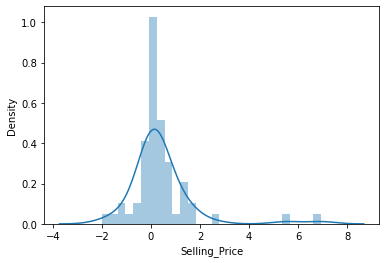

In [55]:
sns.distplot(y_test-y_pred)

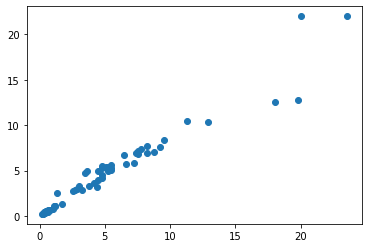

In [56]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [57]:
import modelbit
mb = modelbit.login()

In [60]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

model = pickle.load(open('file.pkl', 'rb'))

standard_to = StandardScaler()

def predict_car_price(Year, Present_Price, Kms_Driven, Owner, Fuel_Type, Seller_Type, Transmission_Type):
    Fuel_Type_Diesel = 0
    Fuel_Type_Petrol = 0

    if Fuel_Type == 'Petrol':
        Fuel_Type_Petrol = 1
    elif Fuel_Type == 'Diesel':
        Fuel_Type_Diesel = 1

    Year = 2024 - Year

    if Seller_Type == 'Individual':
        Seller_Type_Individual = 1
    else:
        Seller_Type_Individual = 0

    if Transmission_Type == 'Manual':
        Transmission_Manual = 1
    else:
        Transmission_Manual = 0

    prediction = model.predict([[Present_Price, Kms_Driven, Owner, Year, Fuel_Type_Diesel, Fuel_Type_Petrol,
                                  Seller_Type_Individual, Transmission_Manual]])
    output = round(prediction[0], 2)

    if output < 0:
        return 'Sorry! You cannot sell this car'
    else:
        return 'You can sell this car at Rs.{} lakhs'.format(output)


/home/mustafa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mustafa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mustafa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.22.1 when using version 1.0.2. This mig

In [61]:
modelbit.deploy(predict_car_price)

Uploading 'model': 100%|██████████████████████| 493k/493k [00:01<00:00, 488kB/s]


In [ ]:
modelbit.get_inference(
  region="ap-south-1",
  workspace="mustafaansari",
  deployment="predict_car_price",
  data=[Year, Present_Price, Kms_Driven, Owner, Fuel_Type, Seller_Type, Transmission_Type]
)